In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [2]:
rouse_montecarlo = np.loadtxt("rouse_mode_monte_carlo.txt", delimiter=",")
rouse_langevin = np.loadtxt("rouse_mode_langevin.txt", delimiter=",")

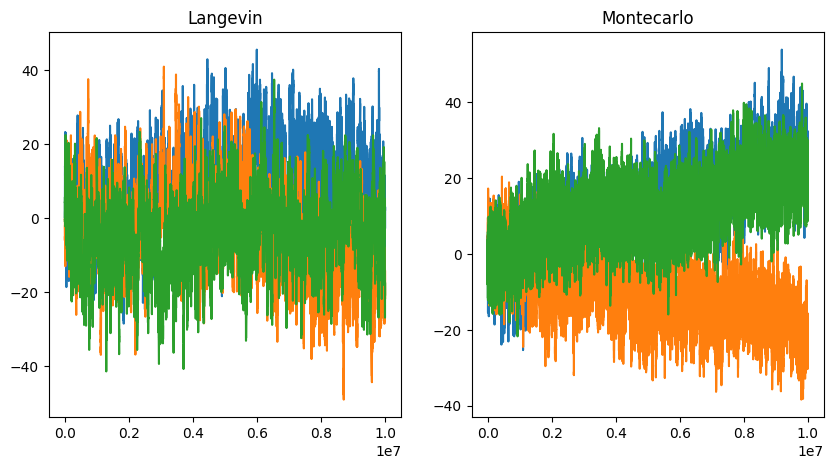

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("Langevin")

plt.plot(rouse_langevin)


plt.subplot(122)
plt.title("Montecarlo")

plt.plot(rouse_montecarlo)


plt.show()

In [4]:
print(f"Montecarlo\t Average: {np.average(rouse_montecarlo)} \t Variance: {np.sqrt(np.var(rouse_montecarlo))}")
print(f"Langevin\t Average: {np.average(rouse_langevin)} \t Variance: {np.sqrt(np.var(rouse_langevin))}")

Montecarlo	 Average: 4.256107420172071 	 Variance: 14.021963716961338
Langevin	 Average: 0.10223426256615605 	 Variance: 12.690728884400789


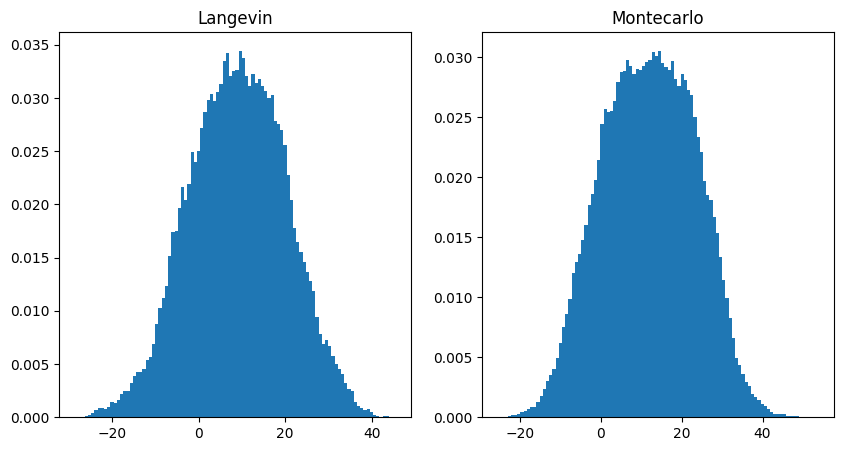

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("Langevin")

plt.hist(rouse_langevin[:,0], density=True, bins=100)


plt.subplot(122)
plt.title("Montecarlo")

plt.hist(rouse_montecarlo[:,0], density=True, bins=100)


plt.show()

In [6]:
def corr(data):
    corr = []
    corr.append(correlate(data[:,0], data[:,0], mode='full'))
    corr.append(correlate(data[:,1], data[:,1], mode='full'))
    corr.append(correlate(data[:,1], data[:,1], mode='full'))
    
    return np.average(corr, axis=0)/np.average(np.power(data, 2))

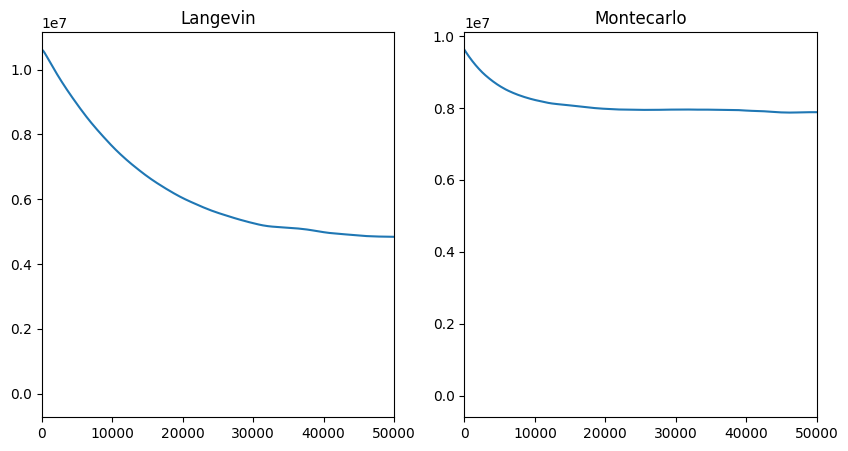

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("Langevin")
plt.xlim(0, 5 * 1e4)
auto_corr = corr(rouse_langevin)
plt.plot(auto_corr[int(len(auto_corr)/2):])


plt.subplot(122)
plt.title("Montecarlo")
plt.xlim(0, 5 * 1e4)
auto_corr = corr(rouse_montecarlo)
plt.plot(auto_corr[int(len(auto_corr)/2):])


plt.show()